# N-Dimensional Data Modeling (More than one Feature)

<font color="red">Numpy Polyfit just can not handle this! So we need to go to more advanced libraries</font>

We are using a dataset from Kaggle:
https://www.kaggle.com/ishaanv/ISLR-Auto 


Download the dataset and upload the Advertising.csv to your Colab 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Forming the problem
$$Sales=\theta_0+\theta_1(TV Advertisements)+\theta_2(Radio Advertisement)$$



In [ ]:
X = data[['TV','Radio']]
y = data['Sales']
m=len(data['Sales'])
print (X)

        TV  Radio
0    230.1   37.8
1     44.5   39.3
2     17.2   45.9
3    151.5   41.3
4    180.8   10.8
..     ...    ...
195   38.2    3.7
196   94.2    4.9
197  177.0    9.3
198  283.6   42.0
199  232.1    8.6

[200 rows x 2 columns]


## SciKit-Learn (Machine Learning Module)

Source:

https://scikit-learn.org/stable/


### Data Split Data (Shuffle included!)

Make sure you have watched the Machine Learning Overview videos on Supervised Learning to understand why we do this step

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train

,TV,Radio
4,180.8,10.8
129,59.6,12.0
150,280.7,13.9
63,102.7,29.6
183,287.6,43.0
...,...,...
86,76.3,27.5
33,265.6,20.0
78,5.4,29.9
49,66.9,11.7


### Forming the model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)

### Training

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
model.coef_

array([0.04686672, 0.17697137])

In [ ]:
model.intercept_

3.0263197098825536

### Predictions

In [ ]:
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)
print(train_predictions)

[ 9.68712373  5.27134121 20.95606889 10.82577436  8.93731594 15.44771066
  9.16665244 10.06719279  7.50203211 10.51935771 14.97355784  9.82553934
  8.47604825 20.54798518  9.93586768 17.20157572 15.40837593  3.80101343
 17.0616292  13.98616238 11.55201636 21.09049707  8.75083879 18.08035315
 12.12833893 10.53740516 19.49840837 14.99054292 19.48268502 15.96698143
 20.43498382  9.43066405  6.45880531  3.71106235 16.47058725 20.26009162
 16.40137658 16.49519548 17.33591845 21.61395894 15.26964987  5.88763223
 16.27195124 14.87648489  5.47142267 12.45494061 13.60763704 21.68360537
 13.71744416  8.17595596 16.74240714 19.76026107 23.34167774 17.4355462
 12.93890256 17.29793661  8.98228151 10.70297671  8.23226865  8.23362154
 12.08796035 11.58679685  9.93796679  6.78503103 21.07891924 12.15107876
  6.74851457 20.64213447 13.63860951  6.04408107 12.96756375 11.95541339
 14.05118195 17.77280861 17.23444223  8.57084408 19.0191929  10.27701785
 24.08949893  7.90595748 19.75661112 10.10490405  4.

### Evaluate the model

#### Visualize the result

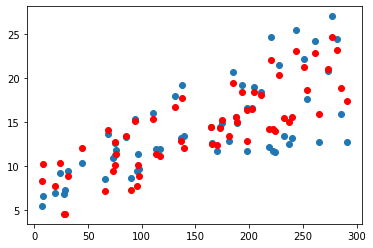

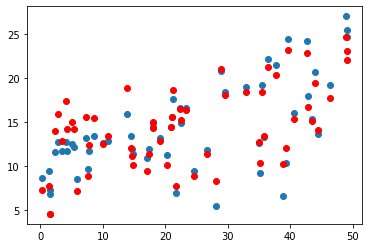

In [ ]:
plt.scatter(X_test['TV'],y_test)
plt.scatter(X_test['TV'],test_predictions,color='red')
plt.figure()
plt.scatter(X_test['Radio'],y_test)
plt.scatter(X_test['Radio'],test_predictions,color='red')

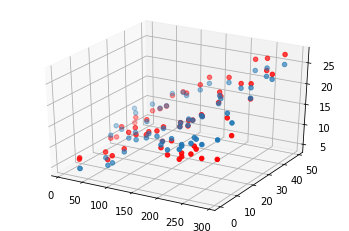

In [ ]:
ax = plt.axes(projection="3d")
ax.scatter3D(X_test['TV'],X_test['Radio'],test_predictions)
ax.scatter3D(X_test['TV'],X_test['Radio'],y_test, color='red')


#### Visualizing error - Residuals

The best model may have zero residuals!

In [ ]:
test_res = abs(y_test - test_predictions)

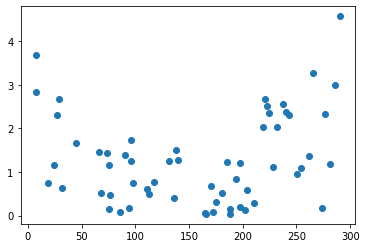

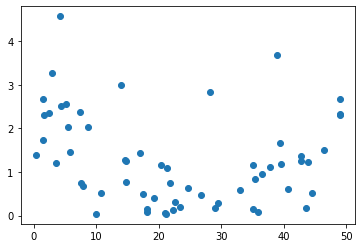

In [ ]:
plt.scatter(X_test['TV'],test_res)
plt.figure()
plt.scatter(X_test['Radio'],test_res)


#### Evaluate on Test Data

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE_Test = mean_squared_error(y_test,test_predictions)
print (MSE_Test)

2.6890534877772243


#### Evaluate on Training Data

In [ ]:
MSE_Train = mean_squared_error(y_train,train_predictions)
print (MSE_Train)

2.8743099719533105
